# Лабораторная работа № 1. Предварительная обработка данных
## Выполнил вариант №4 студент группы 18-ИВТ-3 Модин Артем Александрович	 
    Цель лабораторной работы – получение навыков работы с библиотеками анализа данных, предварительной обработки данных, средствами визуализации.
####                                      Дожди в Индии
1. Постройте графики количества осадков по годам в разных штатах. Сделайте выводы по построенным графикам.
2. Постройте графики количества осадков по месяцам по всем годам кумулятивно. Сделайте выводы по построенным графикам.
3. Постройте графики количества осадков по штатам, используйте boxplot. Сделайте выводы по построенным графикам.
4. Определите штаты, для которых количество осадков минимально и максимально.
5. Выведите уникальные имена штатов и территорий Индии.
6. Определите количество лет наблюдений для каждого штата.
7. Определите штат с наименьшим количеством наблюдений
8. Добавьте в набор данных признак, являющийся суммой двух других признаков.
9. Вычислите корреляцию Пирсона и Спирмена между признаками NOV и MAR. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.


In [1]:
import numpy as np
import pandas as pd

In [2]:
dist = pd.read_csv("dist.csv")
rainindi = pd.read_csv("rainindi.csv")

In [3]:
dist


,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5


In [4]:
rainindi

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [5]:
print(rainindi.head())

                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    690.6  
3   

In [6]:
print(dist.head())

                 STATE_UT_NAME       DISTRICT    JAN   FEB    MAR    APR  \
0  ANDAMAN And NICOBAR ISLANDS        NICOBAR  107.3  57.9   65.2  117.0   
1  ANDAMAN And NICOBAR ISLANDS  SOUTH ANDAMAN   43.7  26.0   18.6   90.5   
2  ANDAMAN And NICOBAR ISLANDS  N & M ANDAMAN   32.7  15.9    8.6   53.4   
3            ARUNACHAL PRADESH          LOHIT   42.2  80.8  176.4  358.5   
4            ARUNACHAL PRADESH     EAST SIANG   33.3  79.5  105.9  216.5   

     MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  \
0  358.5  295.5  285.0  271.9  354.8  326.0  315.2  250.9  2805.2    165.2   
1  374.4  457.2  421.3  423.1  455.6  301.2  275.8  128.3  3015.7     69.7   
2  343.6  503.3  465.4  460.9  454.8  276.1  198.6  100.0  2913.3     48.6   
3  306.4  447.0  660.1  427.8  313.6  167.1   34.1   29.8  3043.8    123.0   
4  323.0  738.3  990.9  711.2  568.0  206.9   29.5   31.7  4034.7    112.8   

   Mar-May  Jun-Sep  Oct-Dec  
0    540.7   1207.2    892.1  
1    483.5  

In [7]:
print(rainindi.tail())

      SUBDIVISION  YEAR   JAN   FEB   MAR   APR    MAY    JUN    JUL    AUG  \
4111  LAKSHADWEEP  2011   5.1   2.8   3.1  85.9  107.2  153.6  350.2  254.0   
4112  LAKSHADWEEP  2012  19.2   0.1   1.6  76.8   21.2  327.0  231.5  381.2   
4113  LAKSHADWEEP  2013  26.2  34.4  37.5   5.3   88.3  426.2  296.4  154.4   
4114  LAKSHADWEEP  2014  53.2  16.1   4.4  14.9   57.4  244.1  116.1  466.1   
4115  LAKSHADWEEP  2015   2.2   0.5   3.7  87.1  133.1  296.6  257.5  146.4   

        SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
4111  255.2  117.4  184.3   14.9  1533.7      7.9    196.2   1013.0    316.6  
4112  179.8  145.9   12.4    8.8  1405.5     19.3     99.6   1119.5    167.1  
4113  180.0   72.8   78.1   26.7  1426.3     60.6    131.1   1057.0    177.6  
4114  132.2  169.2   59.0   62.3  1395.0     69.3     76.7    958.5    290.5  
4115  160.4  165.4  231.0  159.0  1642.9      2.7    223.9    860.9    555.4  


In [8]:
print(dist.tail())

    STATE_UT_NAME        DISTRICT   JAN   FEB   MAR    APR    MAY    JUN  \
636        KERALA          IDUKKI  13.4  22.1  43.6  150.4  232.6  651.6   
637        KERALA        KASARGOD   2.3   1.0   8.4   46.9  217.6  999.6   
638        KERALA  PATHANAMTHITTA  19.8  45.2  73.9  184.9  294.7  556.9   
639        KERALA         WAYANAD   4.8   8.3  17.5   83.3  174.6  698.1   
640   LAKSHADWEEP     LAKSHADWEEP  20.8  14.7  11.8   48.9  171.7  330.2   

        JUL    AUG    SEP    OCT    NOV   DEC  ANNUAL  Jan-Feb  Mar-May  \
636   788.9  527.3  308.4  343.2  172.9  48.1  3302.5     35.5    426.6   
637  1108.5  636.3  263.1  234.9   84.6  18.4  3621.6      3.3    272.9   
638   539.9  352.7  266.2  359.4  213.5  51.3  2958.4     65.0    553.5   
639  1110.4  592.9  230.7  213.1   93.6  25.8  3253.1     13.1    275.4   
640   287.7  217.5  163.1  157.1  117.7  58.8  1600.0     35.5    232.4   

     Jun-Sep  Oct-Dec  
636   2276.2    564.2  
637   3007.5    337.9  
638   1715.7    624.

In [9]:
print(rainindi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4112 non-null float64
FEB            4113 non-null float64
MAR            4110 non-null float64
APR            4112 non-null float64
MAY            4113 non-null float64
JUN            4111 non-null float64
JUL            4109 non-null float64
AUG            4112 non-null float64
SEP            4110 non-null float64
OCT            4109 non-null float64
NOV            4105 non-null float64
DEC            4106 non-null float64
ANNUAL         4090 non-null float64
Jan-Feb        4110 non-null float64
Mar-May        4107 non-null float64
Jun-Sep        4106 non-null float64
Oct-Dec        4103 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.1+ KB
None


In [10]:
dist.dropna(inplace = True)
print(dist)

                   STATE_UT_NAME        DISTRICT    JAN   FEB    MAR    APR  \
0    ANDAMAN And NICOBAR ISLANDS         NICOBAR  107.3  57.9   65.2  117.0   
1    ANDAMAN And NICOBAR ISLANDS   SOUTH ANDAMAN   43.7  26.0   18.6   90.5   
2    ANDAMAN And NICOBAR ISLANDS   N & M ANDAMAN   32.7  15.9    8.6   53.4   
3              ARUNACHAL PRADESH           LOHIT   42.2  80.8  176.4  358.5   
4              ARUNACHAL PRADESH      EAST SIANG   33.3  79.5  105.9  216.5   
..                           ...             ...    ...   ...    ...    ...   
636                       KERALA          IDUKKI   13.4  22.1   43.6  150.4   
637                       KERALA        KASARGOD    2.3   1.0    8.4   46.9   
638                       KERALA  PATHANAMTHITTA   19.8  45.2   73.9  184.9   
639                       KERALA         WAYANAD    4.8   8.3   17.5   83.3   
640                  LAKSHADWEEP     LAKSHADWEEP   20.8  14.7   11.8   48.9   

       MAY    JUN     JUL    AUG    SEP    OCT    N

In [11]:
d = rainindi.describe()
d

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [12]:
rainindi.shape

(4116, 19)

In [13]:
import seaborn as sns

In [14]:
%matplotlib inline

### Задание №1

In [15]:
rainindi.pivot_table(values='ANNUAL',index='YEAR',columns='SUBDIVISION')

SUBDIVISION,ANDAMAN & NICOBAR ISLANDS,ARUNACHAL PRADESH,ASSAM & MEGHALAYA,BIHAR,CHHATTISGARH,COASTAL ANDHRA PRADESH,COASTAL KARNATAKA,EAST MADHYA PRADESH,EAST RAJASTHAN,EAST UTTAR PRADESH,...,SAURASHTRA & KUTCH,SOUTH INTERIOR KARNATAKA,SUB HIMALAYAN WEST BENGAL & SIKKIM,TAMIL NADU,TELANGANA,UTTARAKHAND,VIDARBHA,WEST MADHYA PRADESH,WEST RAJASTHAN,WEST UTTAR PRADESH
YEAR,,,,,,,,,,,,,,,,,,,,,
1901,3373.2,NaN,2498.6,952.3,1387.0,993.8,3056.9,1332.7,412.5,873.2,...,181.3,1003.0,2113.2,960.3,827.7,1562.5,1093.3,718.2,158.9,775.9
1902,3520.7,NaN,2952.1,1206.2,923.9,1063.6,3699.2,984.2,578.3,905.2,...,401.1,1020.1,3180.4,1138.2,630.4,1324.2,748.9,911.7,195.6,736.6
1903,2957.4,NaN,2544.7,1016.3,1331.2,1316.2,3317.4,1178.1,686.1,1216.4,...,522.8,1269.9,2404.5,1163.9,1283.4,1306.5,1229.4,949.6,307.0,808.4
1904,3079.6,NaN,2664.1,1269.5,1492.4,860.2,3141.1,1144.2,694.5,1071.2,...,185.6,845.8,2169.9,663.1,526.7,1492.0,753.2,774.4,167.9,945.2
1905,2566.7,NaN,2790.6,1498.5,1251.1,795.2,2652.3,886.0,279.8,891.6,...,290.0,759.4,3005.0,821.1,724.9,1302.1,941.8,696.5,114.4,433.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,3828.0,2193.7,1743.4,1097.1,1302.7,861.9,3908.6,1275.2,802.1,781.2,...,742.5,1087.4,2418.7,926.5,753.1,1564.7,893.2,1063.9,418.7,777.4
2012,3497.6,3440.3,2609.4,1032.4,1377.4,1318.4,NaN,1053.1,693.6,602.7,...,323.8,877.8,2632.2,636.1,1008.6,1223.9,1107.7,1035.2,327.3,389.6
2013,3757.8,2042.9,1816.4,1069.9,1420.0,1120.5,4229.4,1521.9,836.1,1041.4,...,681.8,1110.7,2406.1,741.9,1348.7,1735.4,1520.0,1396.3,389.4,932.8


In [16]:
import matplotlib.pyplot as plt

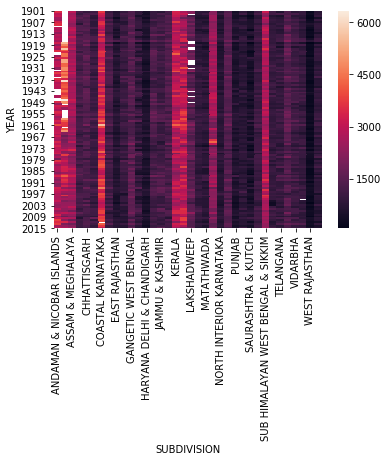

In [17]:
rain = rainindi.pivot_table(
    values='ANNUAL',index='YEAR',columns='SUBDIVISION')
sns.heatmap(rain);

In [18]:
rai = rainindi[['ANNUAL','YEAR','SUBDIVISION']]
rai

,ANNUAL,YEAR,SUBDIVISION
0,3373.2,1901,ANDAMAN & NICOBAR ISLANDS
1,3520.7,1902,ANDAMAN & NICOBAR ISLANDS
2,2957.4,1903,ANDAMAN & NICOBAR ISLANDS
3,3079.6,1904,ANDAMAN & NICOBAR ISLANDS
4,2566.7,1905,ANDAMAN & NICOBAR ISLANDS
...,...,...,...
4111,1533.7,2011,LAKSHADWEEP
4112,1405.5,2012,LAKSHADWEEP
4113,1426.3,2013,LAKSHADWEEP
4114,1395.0,2014,LAKSHADWEEP


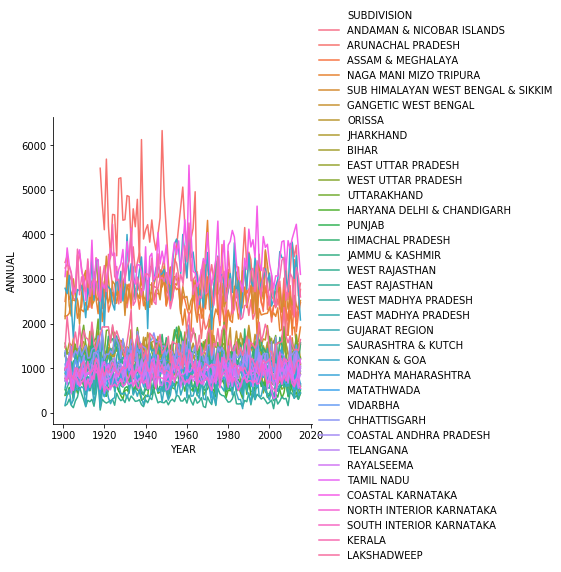

In [19]:
sns.relplot(x = 'YEAR', y= 'ANNUAL', kind= 'line', hue= 'SUBDIVISION',data = rai)


In [20]:
rai.groupby('ANNUAL').sum()


,YEAR
ANNUAL,
62.3,1918
92.4,2002
92.7,1987
114.4,1905
117.6,1918
...,...
5486.3,1918
5553.9,1961
5691.4,1921


In [21]:
rai[rai['ANNUAL'] > 6331]

,ANNUAL,YEAR,SUBDIVISION
142,6331.1,1948,ARUNACHAL PRADESH


In [22]:
Самое большое кол-во осадков было в 1948 году в штате ARUNACHAL PRADESH.

SyntaxError: invalid syntax (<ipython-input-22-f24863482348>, line 1)

### Задание №2

In [23]:
rainindi = 'YEAR'[1][1]-'YEAR'[1][0]
pyplot.bar('YEAR'[1][:-1], cumulative_histo_counts, width=rainindi)

IndexError: string index out of range

In [24]:
rainnn = rainindi[['ANNUAL','YEAR']]
rai.groupby('ANNUAL').sum()
rainnn

,ANNUAL,YEAR
0,3373.2,1901
1,3520.7,1902
2,2957.4,1903
3,3079.6,1904
4,2566.7,1905
...,...,...
4111,1533.7,2011
4112,1405.5,2012
4113,1426.3,2013
4114,1395.0,2014


In [25]:
 #cumulative = True )
ra = rainindi[['YEAR'] + ['JAN'] + ['FEB'] + ['MAR'] + ['APR']+ ['MAY'] + ['JUN'] + ['JUL'] + ['AUG'] + ['SEP'] + ['OCT'] + ['NOV'] + ['DEC']]
ra 

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9
4112,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8
4113,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7
4114,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3


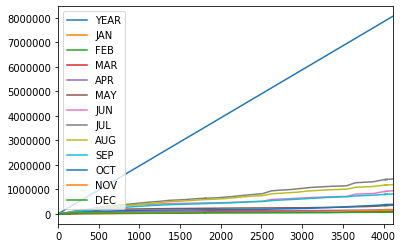

In [26]:
ra = ra.cumsum()
ra.plot()
plt.show()

### Задание №3

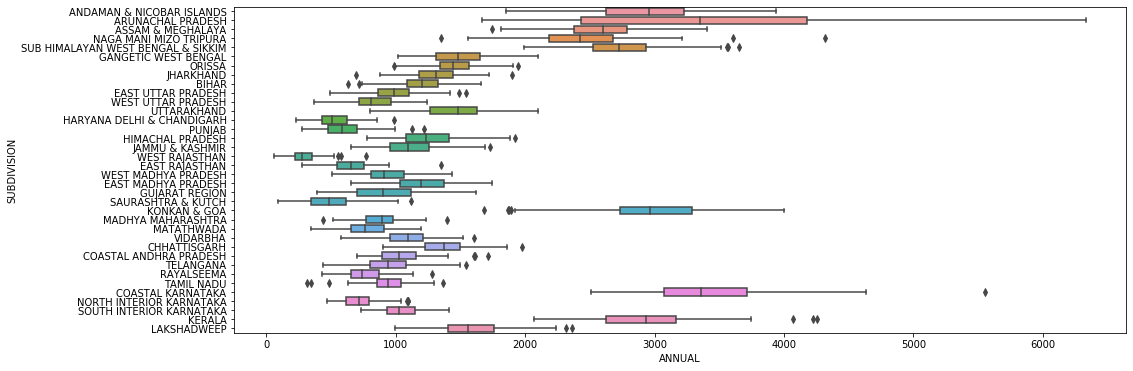

In [27]:
axes = plt.subplots(1, sharey=True, figsize=(16,6))
sns.boxplot(x ='ANNUAL', y = 'SUBDIVISION', data = rainindi)

### Задание №4

In [28]:
rai.groupby('ANNUAL').sum()


,YEAR
ANNUAL,
62.3,1918
92.4,2002
92.7,1987
114.4,1905
117.6,1918
...,...
5486.3,1918
5553.9,1961
5691.4,1921


In [29]:
rai.ANNUAL.min()

62.3

In [30]:
rai.ANNUAL.max()

6331.1

In [31]:
rai[rai['ANNUAL'] > 6331]

,ANNUAL,YEAR,SUBDIVISION
142,6331.1,1948,ARUNACHAL PRADESH


In [32]:
rai[rai['ANNUAL'] <= 62.3]

,ANNUAL,YEAR,SUBDIVISION
1834,62.3,1918,WEST RAJASTHAN


### Задание №5

In [33]:
rainindi.SUBDIVISION.unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

### Задание №6

In [34]:
rai.groupby('SUBDIVISION')[['YEAR']].count()

,YEAR
SUBDIVISION,
ANDAMAN & NICOBAR ISLANDS,110
ARUNACHAL PRADESH,97
ASSAM & MEGHALAYA,115
BIHAR,115
CHHATTISGARH,115
COASTAL ANDHRA PRADESH,115
COASTAL KARNATAKA,115
EAST MADHYA PRADESH,115
EAST RAJASTHAN,115


### Задание №7

In [35]:
nabl = rai.groupby('SUBDIVISION')[['YEAR']].count()
na = nabl.min()
na


YEAR    97
dtype: int64

In [36]:
minnablstate = nabl[nabl['YEAR'] <= 97]
minnablstate

,YEAR
SUBDIVISION,
ARUNACHAL PRADESH,97


### Задание №8

In [37]:
rainindi.assign(first5month=rainindi[['Jan-Feb', 'Mar-May']].sum(1))

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,first5month
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,696.6
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,618.1
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,392.8
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,531.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,311.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6,204.1
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1,118.9
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6,191.7
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5,146.0


### Задание №9

In [38]:
novmar = rainindi[['NOV'] + ['MAR']]
novmar

,NOV,MAR
0,558.2,29.2
1,359.0,12.2
2,284.4,0.0
3,308.7,0.0
4,25.4,3.3
...,...,...
4111,184.3,3.1
4112,12.4,1.6
4113,78.1,37.5
4114,59.0,4.4


In [39]:
s =novmar.corr(method='spearman')
s

,NOV,MAR
NOV,1.000000,0.142525
MAR,0.142525,1.000000


In [40]:
p = novmar.corr(method='pearson')
p

,NOV,MAR
NOV,1.000000,0.008814
MAR,0.008814,1.000000


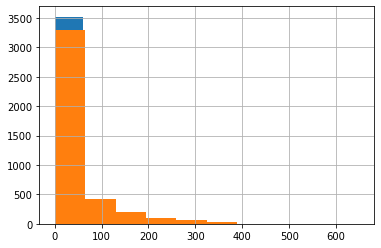

In [41]:
novmar['MAR'].hist()
novmar['NOV'].hist()

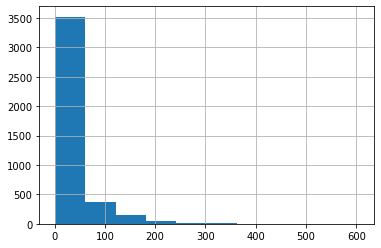

In [42]:
novmar['MAR'].hist()

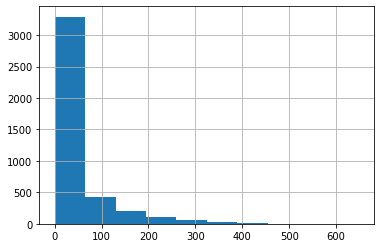

In [43]:
novmar['NOV'].hist()

In [272]:
if p < 0.01:
    print("p-value при корреляции Пирсона хорошая")
else:
    print("p-value при корреляции Пирсона не очень хорошая")
        
        
if s < 0.01:
    print("p-value при корреляции Спирмена хорошая")
else:
    print("p-value при корреляции Спирмена не очень хорошая")

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().